# PART I

## Some Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from keras.datasets import mnist

warnings.filterwarnings('ignore')

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

idx = np.random.permutation(len(X_train))  # Get a portion of the data with random
X_train_subset = X_train[idx][:1000]
y_train_subset = y_train[idx][:1000]

In [ ]:
print('MNIST Dataset Shape:\n')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('Y_test:  ' + str(y_test.shape))
print('X_train_subset: ' + str(X_train_subset.shape))

### For an images has 28x28 pixels = 784px. So reshape 2 dimension.

In [ ]:
X_train_subset = X_train_subset.reshape(1000, 784)
X_train_subset = X_train_subset.astype('float32')  # Change integers to 32-bit floating point numbers
print("Training X_train matrix shape", X_train_subset.shape)

In [ ]:
def transform(components, mean, X):
    # projects data
    X = X - mean
    return np.dot(X, components.T)


def pca(X_train_subset, n_components=4):
    X = X_train_subset  # Get data

    mean = np.mean(X, axis=0)  # mean centering
    X = X - mean

    cov = np.cov(X.T)  # covariance, functions needs samples as columns

    eigenvectors, eigenvalues = np.linalg.eig(cov)  # eigenvectors, eigenvalues
    eigenvectors = eigenvectors.T  # eigenvectors v = [:, i] column vector, transpose this for easier calculations

    idxs = np.argsort(eigenvalues)[::-1]  # sort eigenvectors
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    components = eigenvectors[:n_components]

    X_projected = transform(components, mean, X)  # Project the data onto the 4 primary principal components

    return mean, eigenvalues, X_projected

In [ ]:
mean, weights, vectors = pca(X_train_subset)

print("Shape of X:", X_train_subset.shape)
print("Shape of transformed X:", vectors.shape)

In [67]:
x1 = vectors[:, 0]
x2 = vectors[:, 1]
x3 = vectors[:, 2]

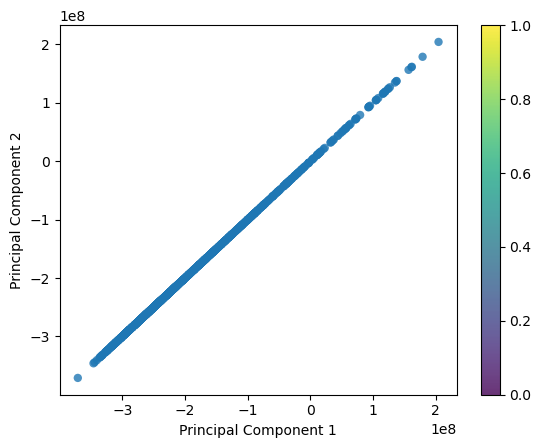

In [68]:
plt.scatter(x1, x2, edgecolor="none", alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

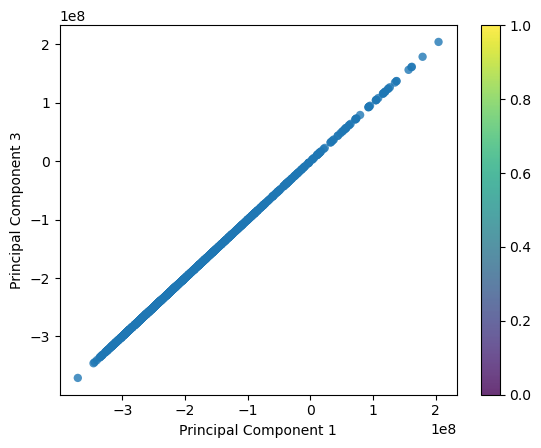

In [69]:
plt.scatter(x1, x3, edgecolor="none", alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.colorbar()
plt.show()

In [70]:
reducedData = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y_train_subset})


In [71]:
reducedData

,x1,x2,x3,y
0,-2.538329e+08+2.312698e- 11j,-2.538322e+08+2.312698e- 11j,-2.539116e+08+4.798847e- 11j,1
1,-2.382079e+08+2.646429e- 12j,-2.381980e+08+2.646429e- 12j,-2.382710e+08+4.161653e- 11j,7
2,-2.767045e+08-3.917481e- 11j,-2.767037e+08-3.917481e- 11j,-2.767543e+08+4.299244e- 11j,0
3,-3.038014e+08+1.752019e- 11j,-3.038006e+08+1.752019e- 11j,-3.038465e+08-1.043658e- 11j,7
4,-2.309140e+08-3.219578e- 11j,-2.309132e+08-3.219578e- 11j,-2.309617e+08+1.550280e- 11j,5
...,...,...,...,...
995,-1.069582e+08+3.828681e- 11j,-1.069575e+08+3.828681e- 11j,-1.070105e+08-8.809368e- 12j,0
996,-3.059950e+08-6.041228e- 12j,-3.059943e+08-6.041228e- 12j,-3.060390e+08+4.477146e- 11j,0
997,-3.364043e+08-3.596958e- 11j,-3.364036e+08-3.596958e- 11j,-3.364681e+08+4.176218e- 11j,4
998,-1.038728e+08+1.240884e- 11j,-1.038720e+08+1.240884e- 11j,-1.039471e+08-6.498268e- 12j,6


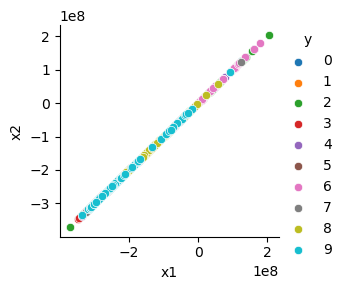

In [58]:
graphics = (sns.FacetGrid(reducedData, hue='y'))
graphics.map(sns.scatterplot, 'x1', 'x2')
graphics.add_legend()

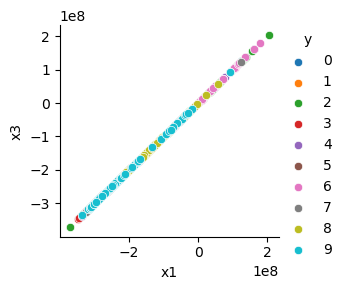

In [57]:
graphics = (sns.FacetGrid(reducedData, hue='y'))
graphics.map(sns.scatterplot, 'x1', 'x3')
graphics.add_legend()

In [72]:
from sklearn.tree import DecisionTreeClassifier

X = reducedData[['x1', 'x2', 'x3']]
y = reducedData['y']

clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

ValueError: Complex data not supported
                                                 x1  \
0   -2.538329e+08+2.312698e-                    11j   
1   -2.382079e+08+2.646429e-                    12j   
2   -2.767045e+08-3.917481e-                    11j   
3   -3.038014e+08+1.752019e-                    11j   
4   -2.309140e+08-3.219578e-                    11j   
..                                              ...   
995 -1.069582e+08+3.828681e-                    11j   
996 -3.059950e+08-6.041228e-                    12j   
997 -3.364043e+08-3.596958e-                    11j   
998 -1.038728e+08+1.240884e-                    11j   
999 -3.075839e+08-3.127472e-                    11j   

                                                 x2  \
0   -2.538322e+08+2.312698e-                    11j   
1   -2.381980e+08+2.646429e-                    12j   
2   -2.767037e+08-3.917481e-                    11j   
3   -3.038006e+08+1.752019e-                    11j   
4   -2.309132e+08-3.219578e-                    11j   
..                                              ...   
995 -1.069575e+08+3.828681e-                    11j   
996 -3.059943e+08-6.041228e-                    12j   
997 -3.364036e+08-3.596958e-                    11j   
998 -1.038720e+08+1.240884e-                    11j   
999 -3.075832e+08-3.127472e-                    11j   

                                                 x3  
0   -2.539116e+08+4.798847e-                    11j  
1   -2.382710e+08+4.161653e-                    11j  
2   -2.767543e+08+4.299244e-                    11j  
3   -3.038465e+08-1.043658e-                    11j  
4   -2.309617e+08+1.550280e-                    11j  
..                                              ...  
995 -1.070105e+08-8.809368e-                    12j  
996 -3.060390e+08+4.477146e-                    11j  
997 -3.364681e+08+4.176218e-                    11j  
998 -1.039471e+08-6.498268e-                    12j  
999 -3.076528e+08+4.837842e-                    11j  

[1000 rows x 3 columns]
